In [1]:
from pandas import read_hdf
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pandas import Categorical
import numpy as np
%matplotlib inline

COLS = "Acceptable	Bad	Good	Very bad".split("\t")

In [2]:
df = read_hdf("preds-completed.hdf", key="df")

In [3]:
big_mss = df[df.transcription.str.len() > 15]


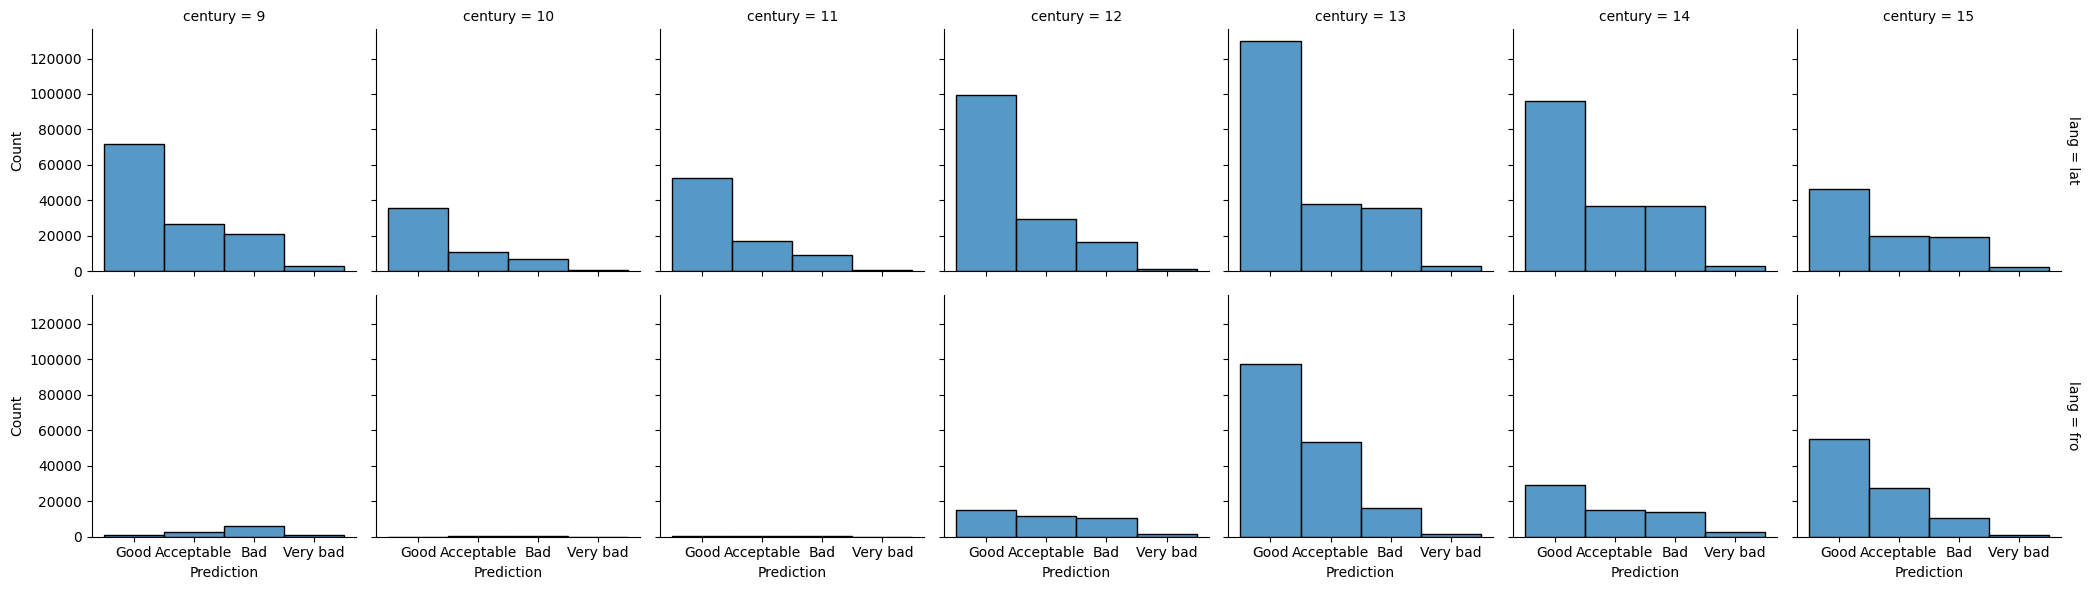

In [4]:
sns.displot(
    big_mss, col="century", row="lang", x="Prediction",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
    col_order=sorted(big_mss.century.unique(), key=lambda x: int(x))
)
                     
plt.savefig("pred_lines.jpg", dpi=300)

In [5]:
big_mss.groupby(["manuscript", "page"])["Prediction"].size()

manuscript      page
btv1b10020145j  f19     18
                f20     32
                f21     18
                f22     32
                f23     22
                        ..
btv1b9081073q   f16     44
                f17     44
                f18     44
                f19     44
                f20     44
Name: Prediction, Length: 17778, dtype: int64

In [6]:
pivot = big_mss.pivot_table(index=['lang', "century", 'manuscript','page'], columns='Prediction', aggfunc='size', fill_value=0).reset_index()
pivot.head()

Prediction,lang,century,manuscript,page,Acceptable,Bad,Good,Very bad
0,fro,10,btv1b52502238m,f84,5,7,0,3
1,fro,10,btv1b52502238m,f86,2,10,0,3
2,fro,10,btv1b52502238m,f87,3,11,0,2
3,fro,10,btv1b52502238m,f88,0,11,0,2
4,fro,10,btv1b52502238m,f93,3,9,0,3


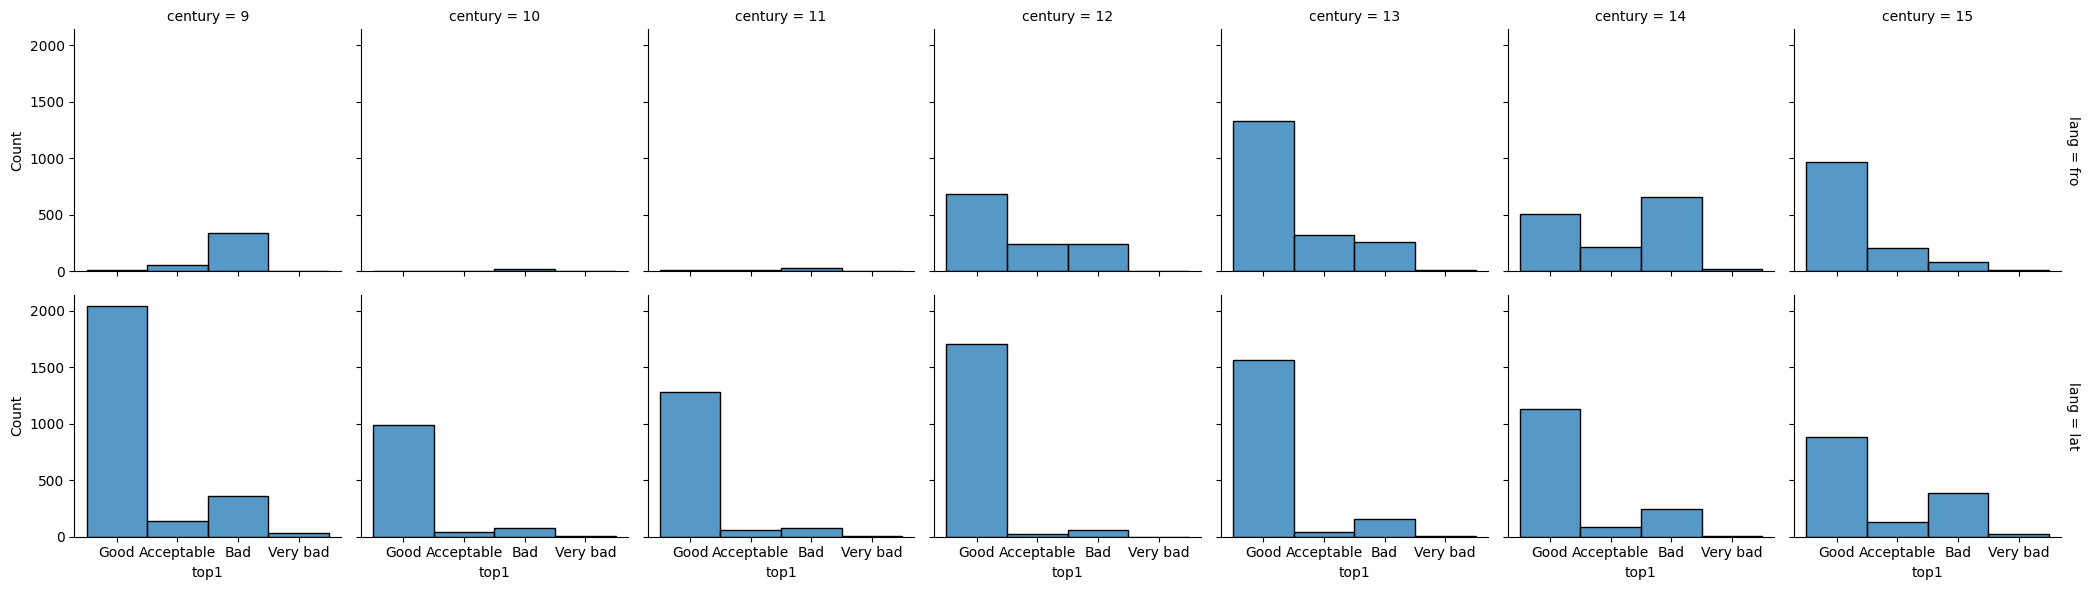

In [7]:
array = pivot[COLS].to_numpy()
pivot["top1"] = Categorical(
    [COLS[maximum] for maximum in array.argmax(axis=1).tolist()], 
    categories=["Good", "Acceptable", "Bad", "Very bad"]
)
pivot["top1simple"] = [COLS[maximum] for maximum in array.argmax(axis=1).tolist()]


sns.displot(
    pivot, col="century", row="lang", x="top1",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
    col_order=sorted(pivot.century.unique(), key=lambda x: int(x))
)

plt.savefig("pred_pages.jpg", dpi=300)

In [8]:
pivot.tail()

Prediction,lang,century,manuscript,page,Acceptable,Bad,Good,Very bad,top1,top1simple
17773,lat,9,btv1b90807925,f16,6,2,50,0,Good,Good
17774,lat,9,btv1b90807925,f17,15,1,44,0,Good,Good
17775,lat,9,btv1b90807925,f18,4,0,55,0,Good,Good
17776,lat,9,btv1b90807925,f19,8,3,48,0,Good,Good
17777,lat,9,btv1b90807925,f20,4,2,54,0,Good,Good


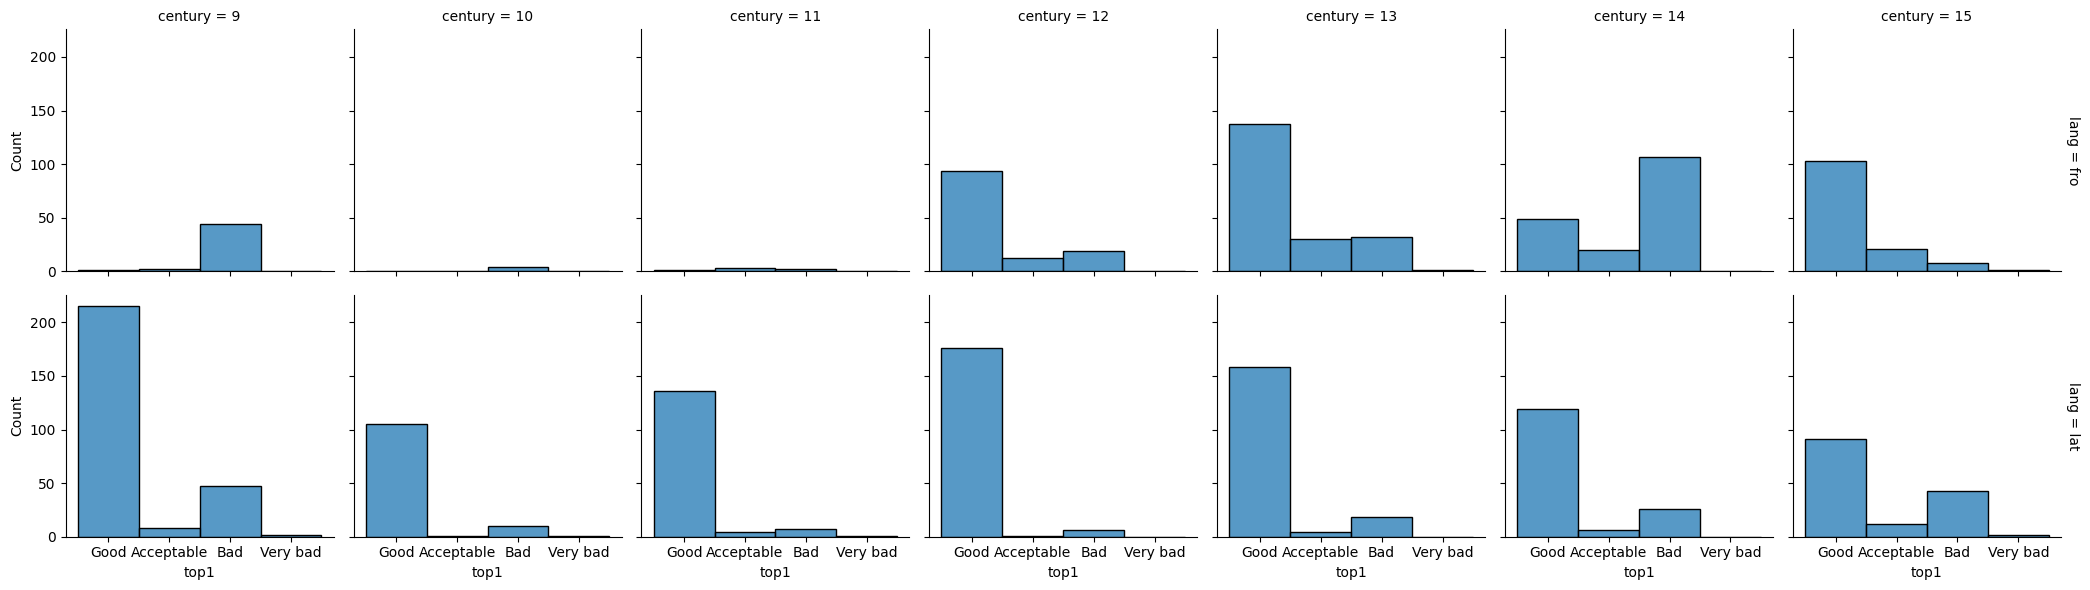

In [9]:
pivot2 = pivot.pivot_table(
    index=['lang', "century", 'manuscript'], 
    columns='top1simple', aggfunc='size', fill_value=0
).reset_index()

array = pivot2[COLS].to_numpy()
pivot2["top1"] = Categorical(
    [COLS[maximum] for maximum in array.argmax(axis=1).tolist()], 
    categories=["Good", "Acceptable", "Bad", "Very bad"]
)

sns.displot(
    pivot2, col="century", row="lang", x="top1",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
    col_order=sorted(pivot2.century.unique(), key=lambda x: int(x))
)
pivot2.tail
plt.savefig("pred_mss.jpg", dpi=300)

In [10]:
import pandas as pd
pd.set_option('display.max_colwidth',1000)

print(pd.concat([
    big_mss[(big_mss.Prediction == col) & (big_mss.lang == lang) & (big_mss.century == str(century))]
        .sample(3)
        .loc[:, ["lang", "century", "transcription", "Prediction"]]
        .sort_values(["lang", "century"])
        
    for col in ["Good", "Acceptable", "Bad", "Very bad"]
    for lang in ["fro", "lat"]
    for century in range(9, 16)
]).to_latex(index=False))

\begin{tabular}{llll}
\toprule
lang & century &                                                                                                                                          transcription & Prediction \\
\midrule
 fro &       9 &                                                                                            cet acte de reule neit curieux puipar la ral̾focation ou la &       Good \\
 fro &       9 &                                                                                                                      gieres il amender. Et se fu diz q &       Good \\
 fro &       9 &                                                                                                        iiẜor pour Iuz dou a dequalar dosar les Iohonde &       Good \\
 fro &      10 &                                                                                                          graindas cansᷤ̾ de cons aibatirnt l noit doui &       Good \\
 fro &      10 &                        

/tmp/ipykernel_95121/532158055.py:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(pd.concat([
